In [21]:
# explore the fullivar maps...
import numpy as np
import matplotlib.pyplot as plt

from pixell import enmap

data_base = '/home/aroman/data/act_pub/'

ells = np.linspace(100, 20000, 50)

map_90 = enmap.read_map(data_base + 'act_dr5.01_s08s18_AA_f090_daynight_map_srcfree.fits')[0]
ivar_90 = enmap.read_map(data_base + 'act_planck_dr5.01_s08s18_AA_f090_daynight_ivar.fits')[0]
fullivar_90_raw = enmap.read_map(data_base + 'act_planck_dr5.01_s08s18_AA_f090_daynight_fullivar.fits')[0]

map_150 = enmap.read_map(data_base + 'act_dr5.01_s08s18_AA_f150_daynight_map_srcfree.fits')[0]
ivar_150 = enmap.read_map(data_base + 'act_planck_dr5.01_s08s18_AA_f150_daynight_ivar.fits')[0]
fullivar_150_raw = enmap.read_map(data_base + 'act_planck_dr5.01_s08s18_AA_f150_daynight_fullivar.fits')[0]

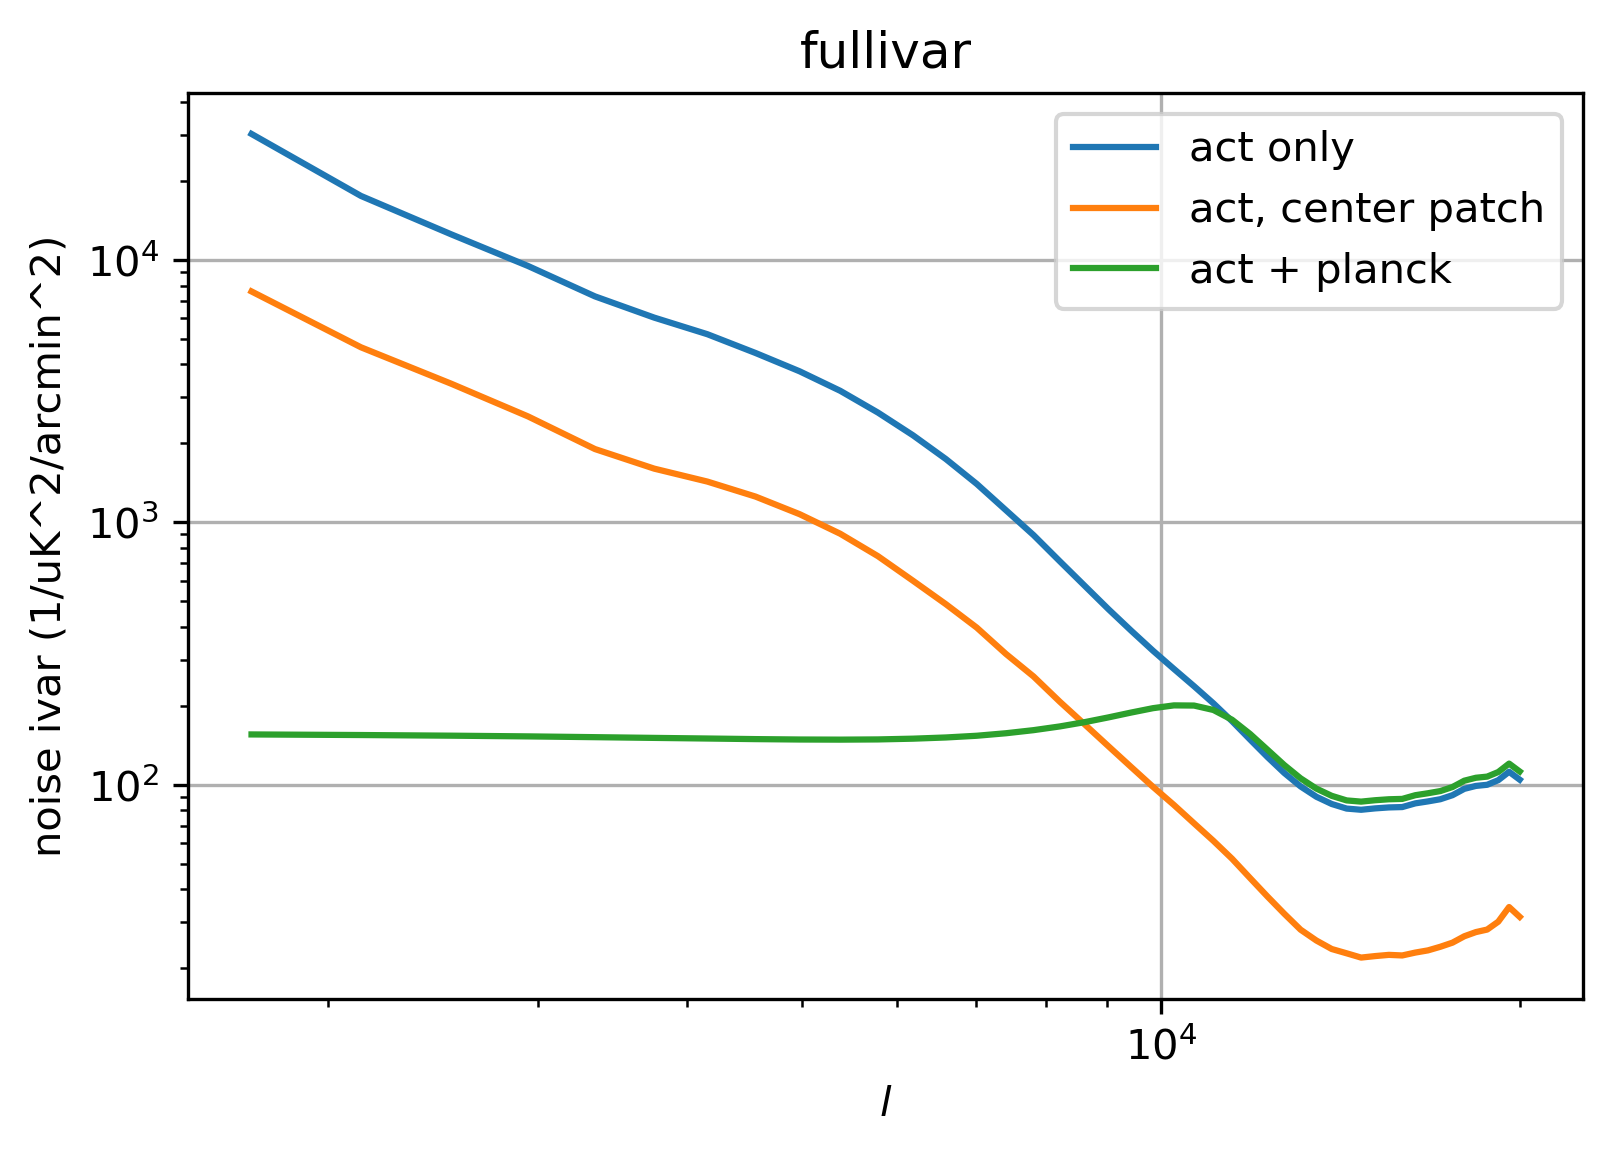

In [30]:
# print(fullivar_150.shape)
fullivar_150_noplanck = fullivar_150_raw.mean(axis=(2,3))[:-2].mean(axis=0)
fullivar_150_middle = fullivar_150_raw.mean(axis=(2,3))[:-2].mean(axis=0)
fullivar_150_all = fullivar_150_raw.mean(axis=(0,2,3))

fullivar_150 = fullivar_150_raw[:-2].sum(axis=0)
fullivar_150_center = fullivar_150[:, 172//2, 720//2]

plt.figure(dpi=300, facecolor='w')
plt.title('fullivar')
plt.plot(ells[4:], np.sqrt(1./fullivar_150_noplanck[4:]), label='act only')
plt.plot(ells[4:], np.sqrt(1./fullivar_150_center[4:]), label='act, center patch')
plt.plot(ells[4:], np.sqrt(1./fullivar_150_all[4:]), label='act + planck')
plt.grid('both')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$l$')
plt.ylabel('noise ivar (1/uK^2/arcmin^2)')
plt.legend()
plt.show()